In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras as kr
from sklearn import preprocessing


## Using a basic neural network on a simple data **set**:

In [2]:
dat=pd.read_csv("optdigits.tra")
#create a training set (tr) and a testing set (ts), and seperate their labels
tr=dat.iloc[0:3058,:]
trl=tr['0.26']
tr=tr.drop('0.26',axis=1)
ts=dat.iloc[3059:,:]
tsl=ts['0.26']
ts=ts.drop('0.26',axis=1)

[[ 0  0  0  1 14  2  0  0]
 [ 0  0  0 10 13  0  1  0]
 [ 0  0  6 13  2  6  9  0]
 [ 0  1 15  4  0 13  6  0]
 [ 0  6 14  6  7 16  2  0]
 [ 0  1  9 13 16 14  5  0]
 [ 0  0  0  0 16  2  0  0]
 [ 0  0  0  0 14  0  0  0]]


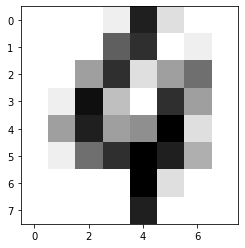

In [8]:
#plot just to ensure it looks right
ex=np.array(tr.iloc[150,:]).reshape(8,8)
plt.imshow(ex,cmap='binary')
print(ex)

In [ ]:
#standardize our data
trs=preprocessing.StandardScaler().fit_transform(tr)
tss=preprocessing.StandardScaler().fit_transform(ts)

In [ ]:
#This creates our model, we add layers to our neural network
basic=kr.models.Sequential([kr.layers.Dense(100,activation='relu',input_size=[64]),
                            kr.layers.Dense(50,activation='relu'),
                            kr.layers.Dense(50,activation='relu'),
                            kr.layers.Dense(10,activation='softmax')])
#Compile our model and choose our loss function +optimizer
basic.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
#run the model using the training sets we have created and select the number of epochs
his=basic.fit(trs,trl,validation_data=(ts,tsl),epochs=10)

Epoch 1/10
96/96 [==============================] - 2s 11ms/step - loss: 2.1485 - accuracy: 0.2979 - val_loss: 2.4900 - val_accuracy: 0.3054
Epoch 2/10
96/96 [==============================] - 1s 7ms/step - loss: 1.6474 - accuracy: 0.6524 - val_loss: 1.2256 - val_accuracy: 0.6343
Epoch 3/10
96/96 [==============================] - 0s 3ms/step - loss: 1.1055 - accuracy: 0.7865 - val_loss: 0.8649 - val_accuracy: 0.7759
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.7252 - accuracy: 0.8712 - val_loss: 1.0340 - val_accuracy: 0.7680
Epoch 5/10
96/96 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.9019 - val_loss: 1.5353 - val_accuracy: 0.7261
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.9225 - val_loss: 1.8347 - val_accuracy: 0.7300
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.9402 - val_loss: 2.2873 - val_accuracy: 0.6868
Epoch 8/10
96/96 [=

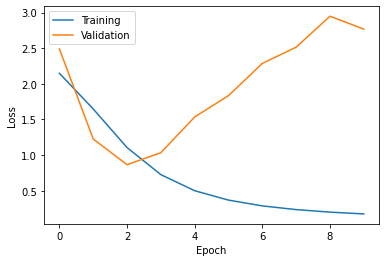

In [ ]:
#plot model loss
plt.plot(np.linspace(0,9,10),his.history['loss'])
plt.plot(np.linspace(0,9,10),his.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training','Validation'])

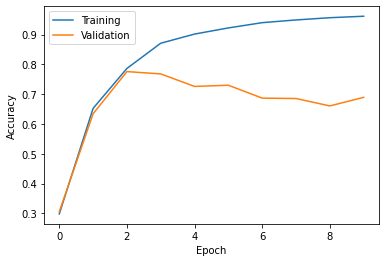

In [ ]:
#plot model accuracy
plt.plot(np.linspace(0,9,10),his.history['accuracy'])
plt.plot(np.linspace(0,9,10),his.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training','Validation'])


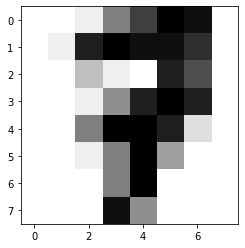

In [ ]:
#print image to verify prediction
plt.imshow(np.array(ts.iloc[5,:]).reshape(8,8),cmap='binary')

In [ ]:
#prediction
pred=basic.predict(tss[5].reshape(1,64))
np.argmax(pred)

1/1 [==============================] - 0s 95ms/step


7

# **Using a simple neural network for more complex images:**


In [9]:
#Load in mnist fashion set, chosen to remain black and white
#training
tt2=pd.read_csv("fashion-mnist_train.csv")
trl2=np.array(tt2['label'])
tr2=tt2.drop('label',axis=1)
#testing
ts2=pd.read_csv('fashion-mnist_test.csv')
tsl2=np.array(ts2['label'])
ts2=ts2.drop('label',axis=1)

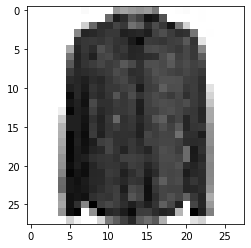

In [12]:
plt.imshow(np.array(tr2.iloc[2,:]).reshape(28,28),cmap='binary')

In [ ]:
#standardize
trs2=preprocessing.StandardScaler().fit_transform(tr2)
tss2=preprocessing.StandardScaler().fit_transform(ts2)


In [ ]:
#create model
lb=kr.models.Sequential([kr.layers.Flatten(input_shape=[784]),kr.layers.Dense(100,activation='relu'),kr.layers.Dense(50,activation='relu'),kr.layers.Dense(50,activation='relu'),kr.layers.Dense(10,activation='softmax')])
lb.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
his=lb.fit(trs2,trl2,validation_data=(tss2,tsl2),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5956 - accuracy: 0.7916 - val_loss: 0.4241 - val_accuracy: 0.8514
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8582 - val_loss: 0.3832 - val_accuracy: 0.8630
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3558 - accuracy: 0.8727 - val_loss: 0.3579 - val_accuracy: 0.8738
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3301 - accuracy: 0.8812 - val_loss: 0.3607 - val_accuracy: 0.8690
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8877 - val_loss: 0.3399 - val_accuracy: 0.8766
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2920 - accuracy: 0.8936 - val_loss: 0.3306 - val_accuracy: 0.8803
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2782 - accuracy: 0.8986 - val_loss: 0.3207 - val_accuracy:

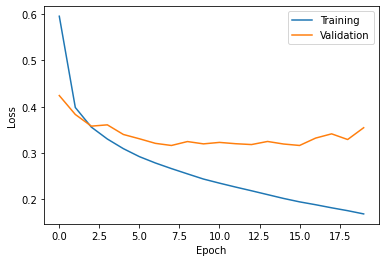

In [ ]:
#plot loss
plt.plot(np.linspace(0,19,20),his.history['loss'])
plt.plot(np.linspace(0,19,20),his.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training','Validation'])

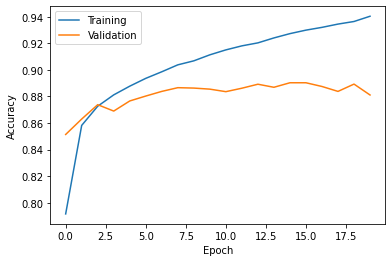

In [ ]:
#plot accuracy
plt.plot(np.linspace(0,19,20),his.history['accuracy'])
plt.plot(np.linspace(0,19,20),his.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training','Validation'])

In [ ]:
#prediction
cloth=np.array(['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])
x=185
pred=lb.predict(tss2[x].reshape(1,784))
print("The Prediction is:",cloth[np.argmax(pred)])
print("The Actual is:",cloth[tsl2[x]])
plt.imshow(np.array(ts2.iloc[x,:]).reshape(28,28),cmap='binary')

NameError: ignored

## **Convolutional Neural Networks**

In [ ]:
#For this we again use the fashion-mnist
cn=kr.models.Sequential([kr.layers.Conv2D(60,kernel_size=3,input_shape=([28,28,1]),activation='relu'),
                         kr.layers.Conv2D(30,kernel_size=3,activation='relu'),
                         kr.layers.Flatten(),
                         kr.layers.Dense(10,activation='softmax')])
#compile the model
cn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#run the fit
his=cn.fit(trs2.reshape(60000,28,28,1),trl2,validation_data=(tss2.reshape(10000,28,28,1),tsl2),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3724 - accuracy: 0.8693 - val_loss: 0.2815 - val_accuracy: 0.9014
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2429 - accuracy: 0.9120 - val_loss: 0.2500 - val_accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1890 - accuracy: 0.9320 - val_loss: 0.2691 - val_accuracy: 0.9091
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1450 - accuracy: 0.9482 - val_loss: 0.2632 - val_accuracy: 0.9106
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1142 - accuracy: 0.9596 - val_loss: 0.3058 - val_accuracy: 0.9089


In [ ]:
#prediction
x=81
pred=cn.predict(tss2[x].reshape(1,28,28,1))
print("The Prediction is:",cloth[np.argmax(pred)])
print("The Actual is:",cloth[tsl2[x]])
plt.imshow(np.array(ts2.iloc[x,:]).reshape(28,28),cmap='binary')

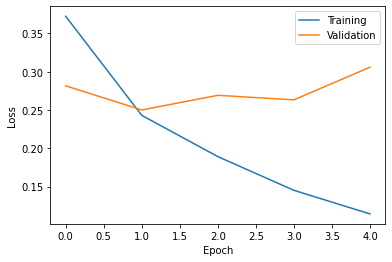

In [ ]:
#plot loss
plt.plot(np.linspace(0,4,5),his.history['loss'])
plt.plot(np.linspace(0,4,5),his.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training','Validation'])

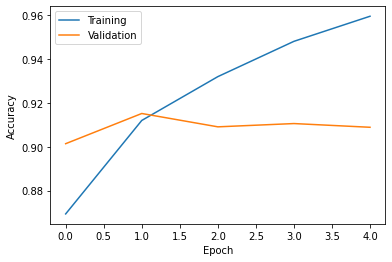

In [ ]:
#plot accuracy
lt.plot(np.linspace(0,4,5),his.history['accuracy'])
plt.plot(np.linspace(0,4,5),his.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training','Validation'])

## **The addition of color**

In [13]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import os
import sklearn.utils as sku

In [14]:
#unzip the desired files to create folders in colab
!unzip seg_train.zip -d col_train
!unzip seg_test.zip -d col_test

Streaming output truncated to the last 5000 lines.
  inflating: col_train/seg_train/street/12857.jpg  
  inflating: col_train/seg_train/street/12861.jpg  
  inflating: col_train/seg_train/street/12870.jpg  
  inflating: col_train/seg_train/street/12875.jpg  
  inflating: col_train/seg_train/street/12876.jpg  
  inflating: col_train/seg_train/street/12878.jpg  
  inflating: col_train/seg_train/street/12880.jpg  
  inflating: col_train/seg_train/street/12883.jpg  
  inflating: col_train/seg_train/street/12884.jpg  
  inflating: col_train/seg_train/street/12898.jpg  
  inflating: col_train/seg_train/street/12917.jpg  
  inflating: col_train/seg_train/street/12926.jpg  
  inflating: col_train/seg_train/street/12931.jpg  
  inflating: col_train/seg_train/street/12935.jpg  
  inflating: col_train/seg_train/street/12946.jpg  
  inflating: col_train/seg_train/street/12947.jpg  
  inflating: col_train/seg_train/street/12958.jpg  
  inflating: col_train/seg_train/street/1297.jpg  
  inflating: c

In [15]:
#step through the folders and get the images in a workable format. Only include the images if they are 150x150 as to not screw up the model
lab=[]
id=[]
#shape = np.shape(tf.zeros([3, 150, 150], tf.int8, '3d'))
shape=np.shape(np.zeros((150,150,3)))

i=0
for l in os.listdir('/content/col_train/seg_train/'):
  if(l=='buildings'):
    i=0
  if(l=='forest'):
    i=1
  if(l=='glacier'):
    i=2
  if(l=='mountain'):
    i=3
  if(l=='sea'):
    i=4
  if(l=='street'):
    i=5
  for f in os.listdir('/content/col_train/seg_train/'+l):
    im = Image.open('/content/col_train/seg_train/'+l+'/'+f)
    #t=transforms.Compose([transforms.PILToTensor()])
    #tens=t(im)
    tens=np.asarray(im)
    if np.shape(tens)==shape:
      id.append(tens)
      lab.append(i)
  i+=1
id,lab=sku.shuffle(id,lab)

labt=[]
idt=[]
#shape = np.shape(tf.zeros([3, 150, 150], tf.int8, '3d'))
shape=np.shape(np.zeros((150,150,3)))

for l in os.listdir('/content/col_test/seg_test'):
  if(l=='buildings'):
    i=0
  if(l=='forest'):
    i=1
  if(l=='glacier'):
    i=2
  if(l=='mountain'):
    i=3
  if(l=='sea'):
    i=4
  if(l=='street'):
    i=5
  for f in os.listdir('/content/col_test/seg_test/'+l):
    im = Image.open('/content/col_test/seg_test/'+l+'/'+f)
    #t=transforms.Compose([transforms.PILToTensor()])
    #tens=t(im)
    tens=np.asarray(im)

    if np.shape(tens)==shape:
      idt.append(tens)
      labt.append(i)
  i+=1
idt,labt=sku.shuffle(idt,labt)

In [16]:
#Create the neural network
cnc=kr.models.Sequential([kr.layers.Conv2D(100,kernel_size=4,input_shape=([150,150,3]),activation='relu')
,kr.layers.MaxPool2D(pool_size=5)
,kr.layers.Dropout(.15)
,kr.layers.Conv2D(50,kernel_size=3,activation='relu')
,kr.layers.MaxPool2D(pool_size=4)
,kr.layers.Dropout(.15)
,kr.layers.Conv2D(50,kernel_size=3,activation='relu')
,kr.layers.MaxPool2D(pool_size=4)
,kr.layers.Dropout(.15)
,kr.layers.Flatten()
,kr.layers.Dense(64,activation='relu')
,kr.layers.Dense(6,activation='softmax')])

#compile the model
cnc.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fit the model
his=cnc.fit(np.array(id),np.array(lab),validation_data=(np.array(idt),np.array(labt)),epochs=50)

Epoch 1/50
 30/438 [=>............................] - ETA: 9:01 - loss: 11.2093 - accuracy: 0.2365

KeyboardInterrupt: ignored

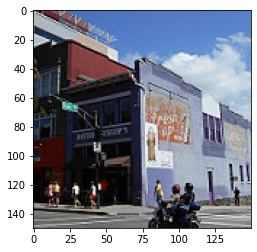

In [19]:
#prediction
loc=np.array(['buildings','forest','glacier','mountain','sea','street'])

x=180
plt.imshow(idt[x])
pred=cnc.predict(idt[x].reshape(1,150,150,3))
print("The Prediction is:",loc[np.argmax(pred)])
print("The Actual is:",loc[labt[x]])

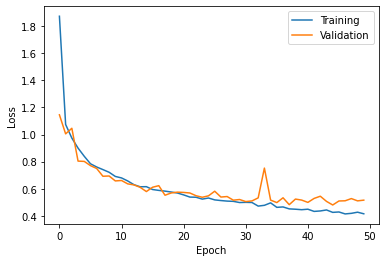

In [ ]:
#plot loss
plt.plot(np.linspace(0,49,50),his.history['loss'])
plt.plot(np.linspace(0,49,50),his.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training','Validation'])

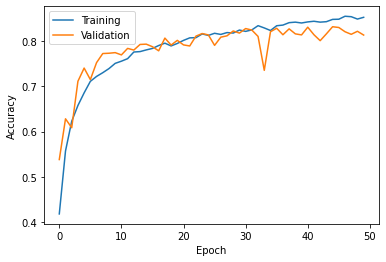

In [ ]:
#plot accuracy
plt.plot(np.linspace(0,49,50),his.history['accuracy'])
plt.plot(np.linspace(0,49,50),his.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training','Validation'])